In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()
plt.style.use("ggplot")

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.diagnosis.unique()
# M = Malignint
# B = Benign

array(['M', 'B'], dtype=object)

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

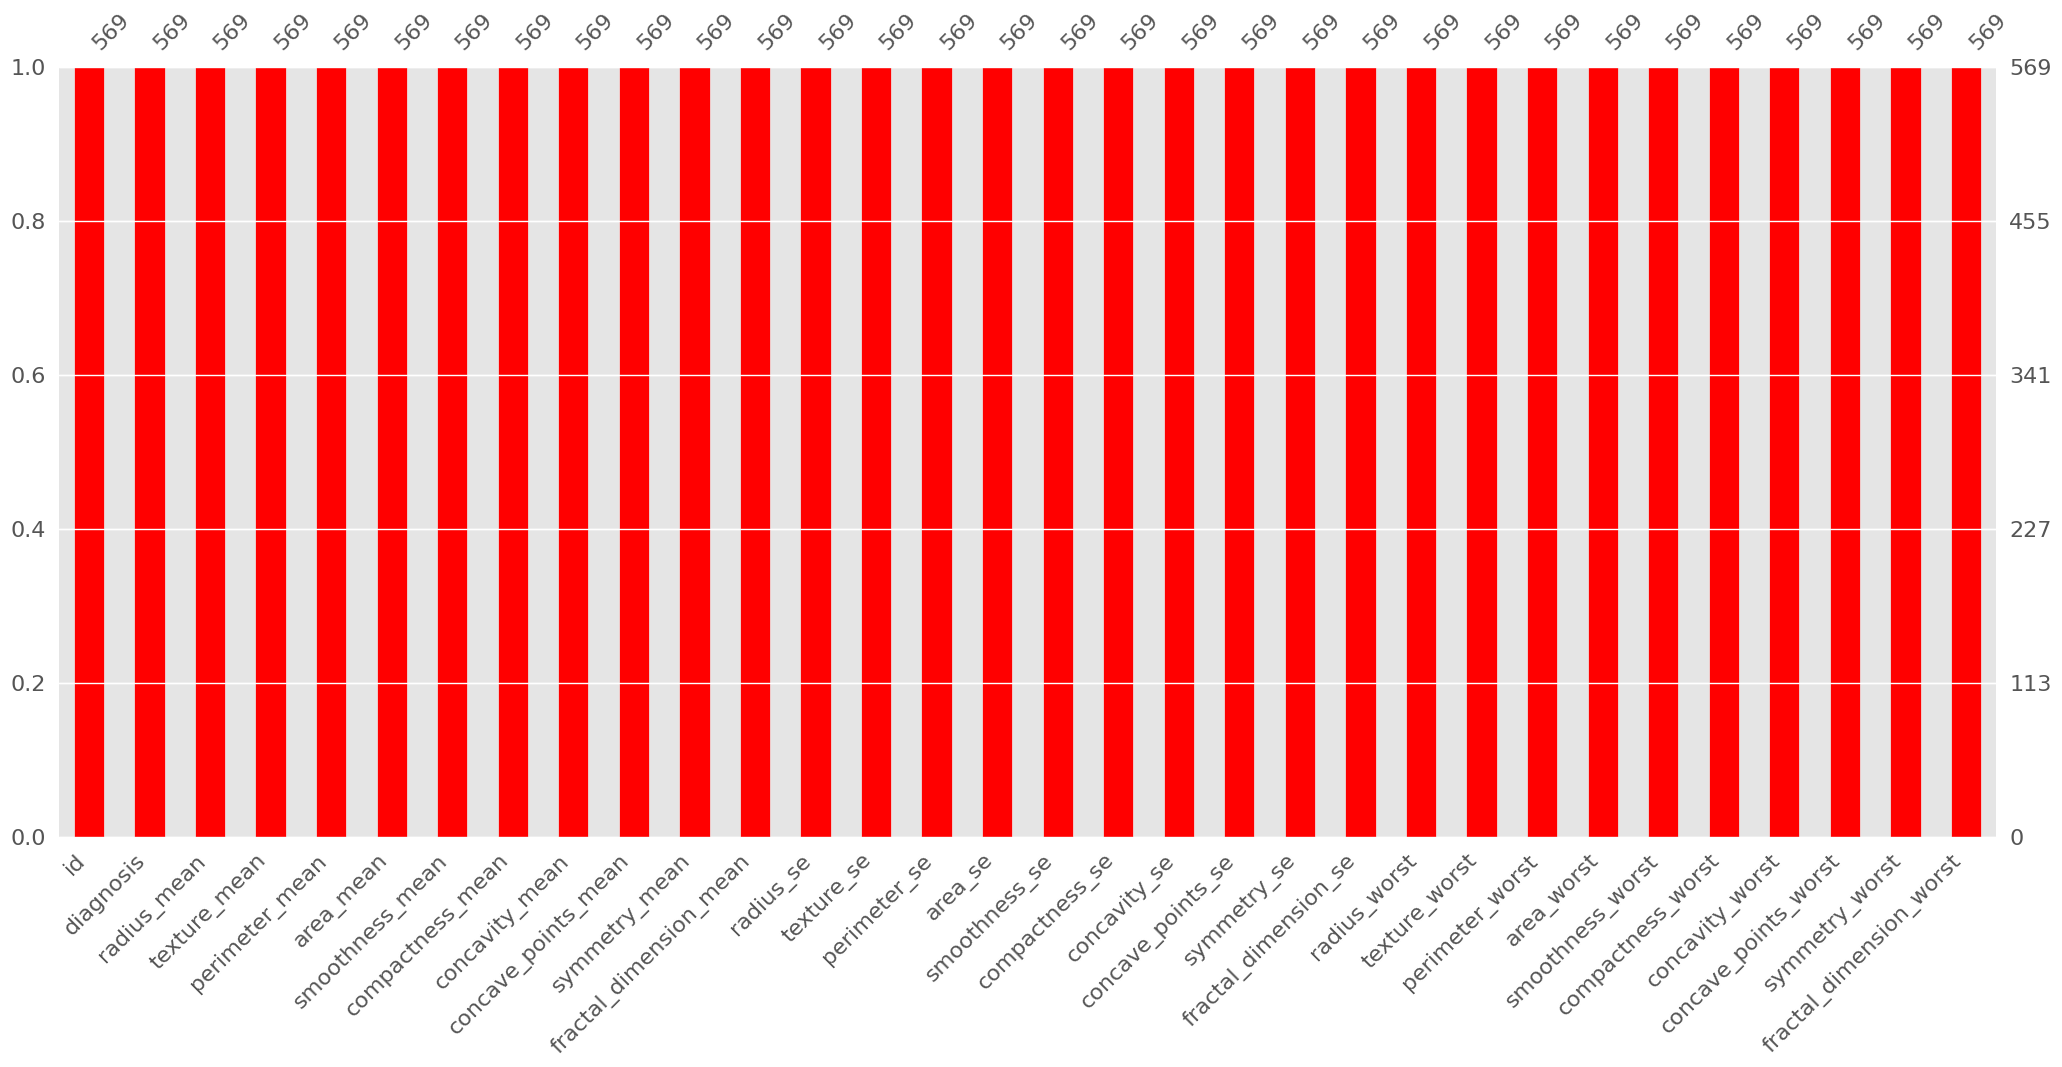

In [10]:
msno.bar(data, color = "red")

In [11]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [12]:
data["diagnosis"].value_counts()*100/len(data)

diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

In [15]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
data.iloc[20:50]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
22,8511133,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,...,18.070,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
23,851509,1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
24,852552,1,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.091700,...,26.460,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
25,852631,1,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.140100,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
26,852763,1,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.087830,...,17.620,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750
27,852781,1,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.077310,...,21.310,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
28,852973,1,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.087510,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876
29,853201,1,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.079530,...,20.010,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919


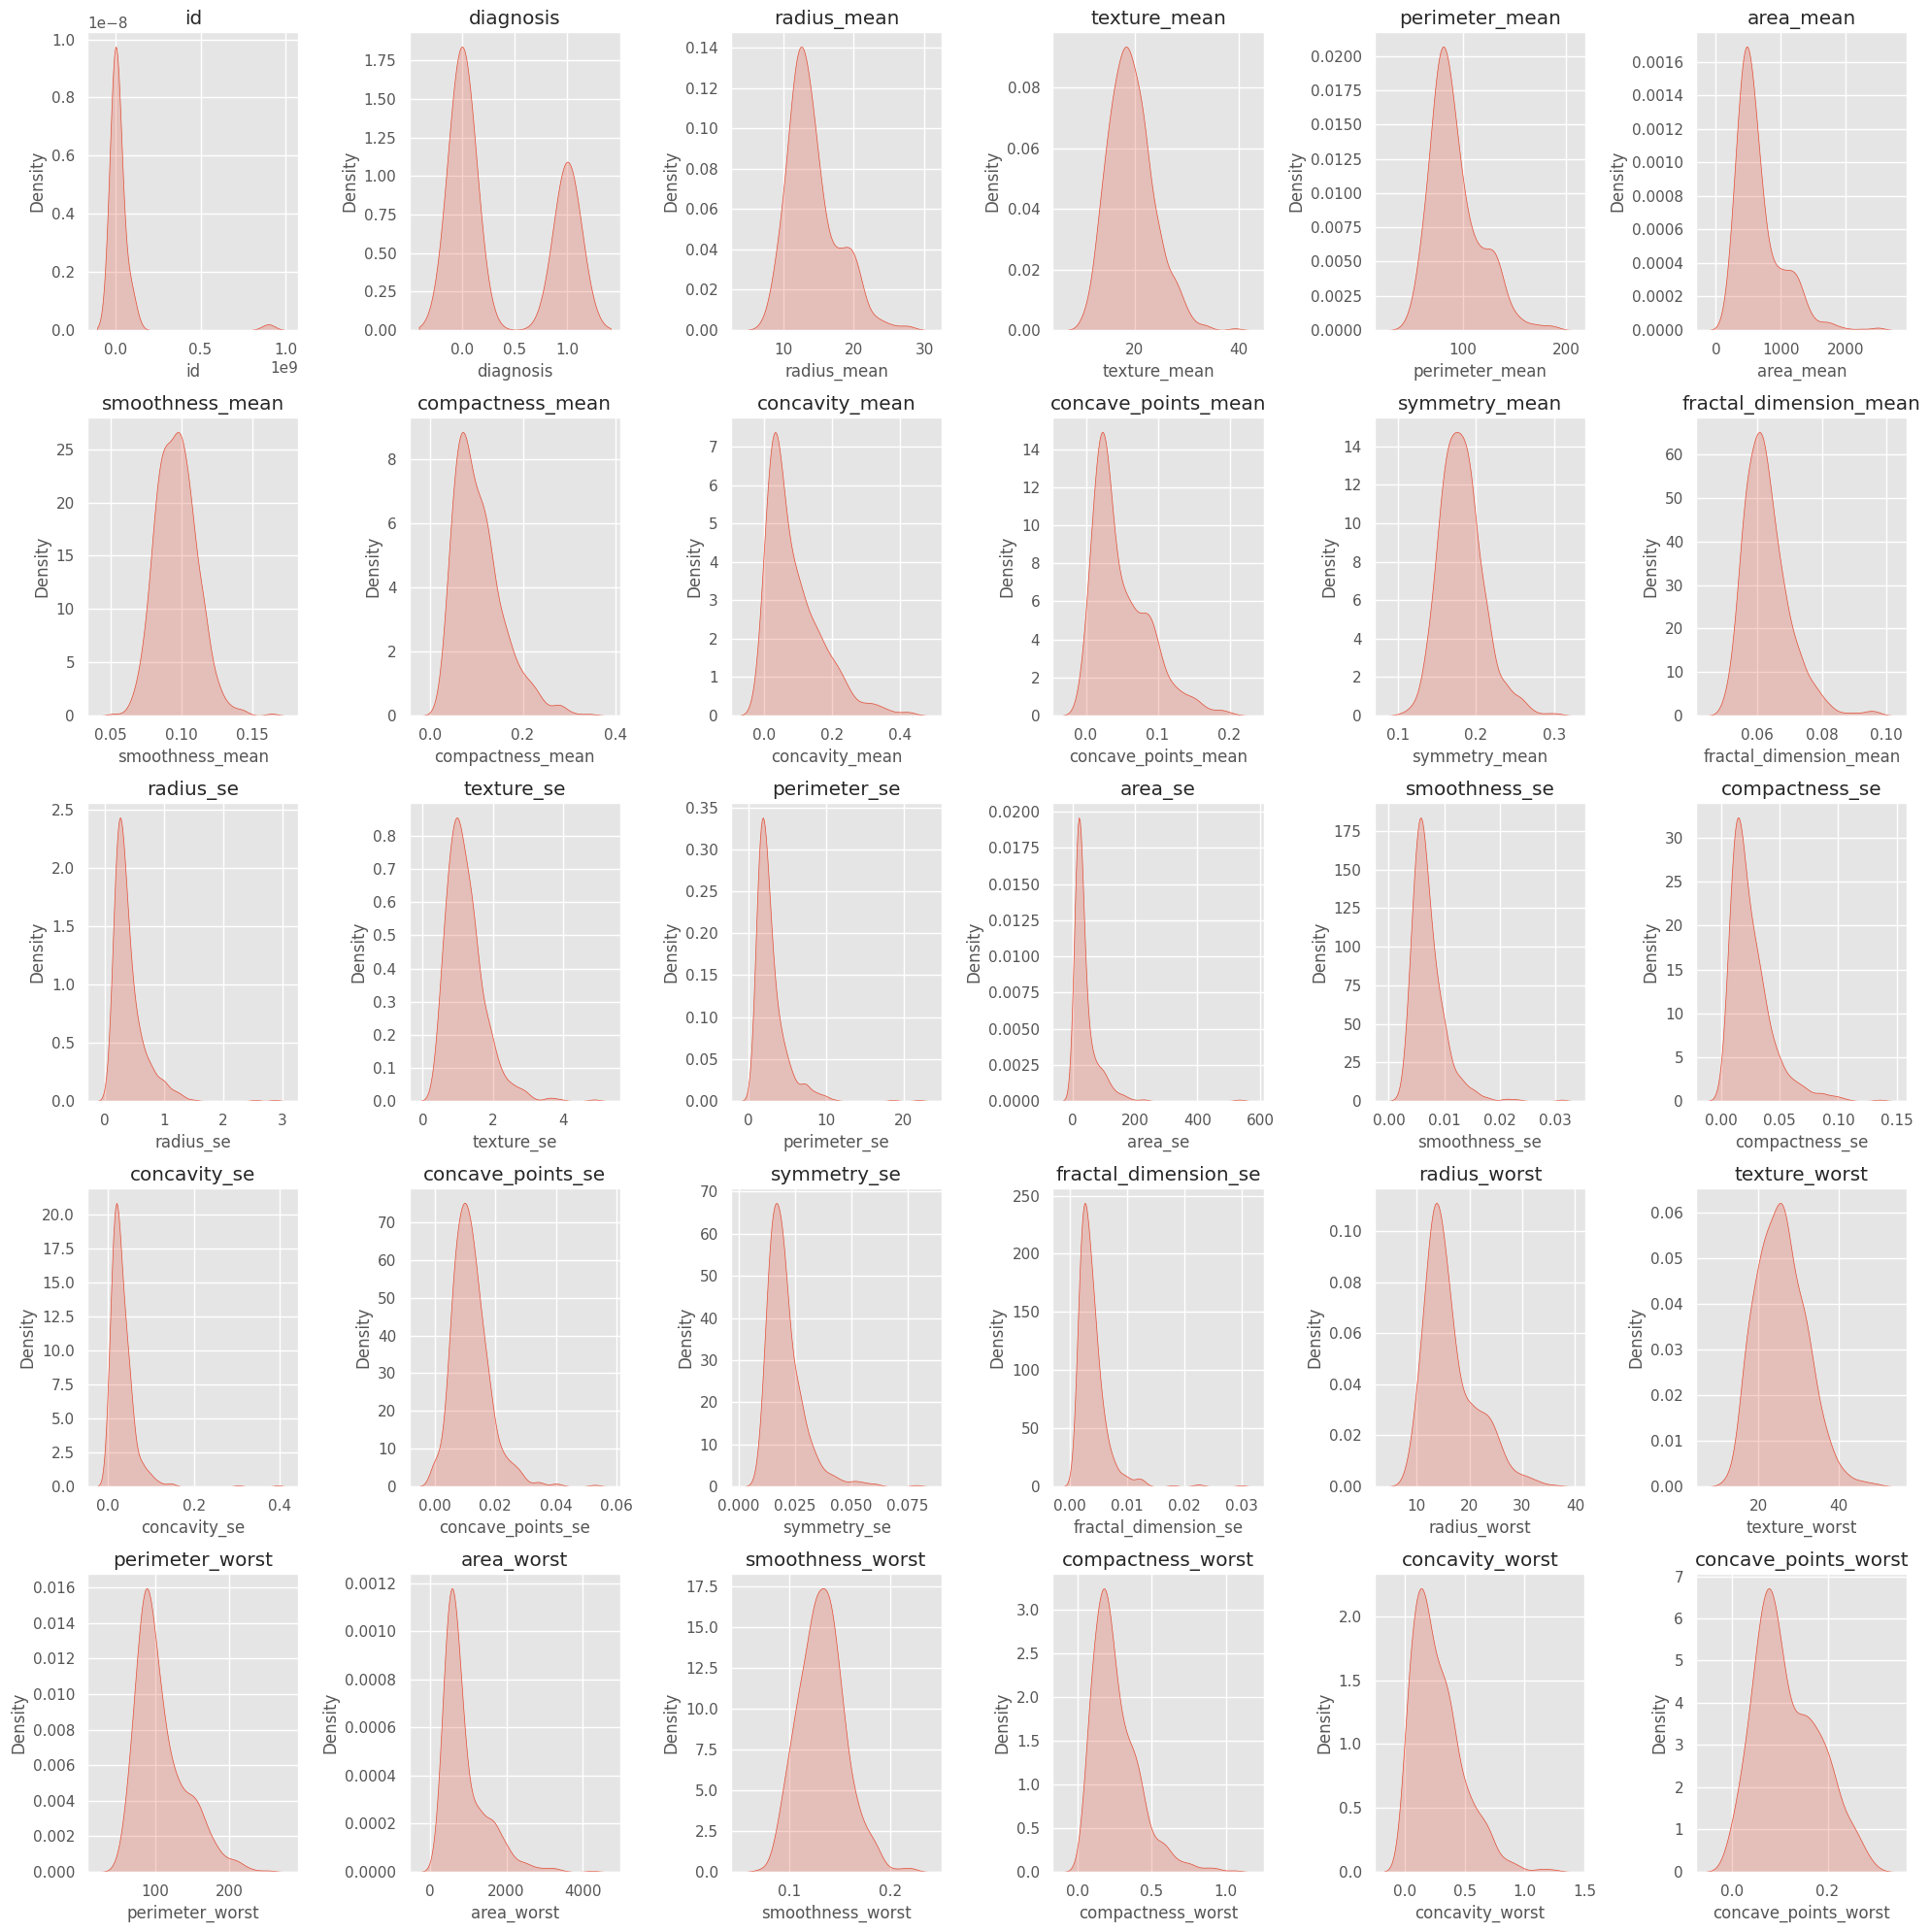

In [24]:
plt.figure(figsize=(20, 20))
plotnumber = 1
columns = data.columns

for col in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.kdeplot(data[col], fill=True)
        ax.set_title(col)
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


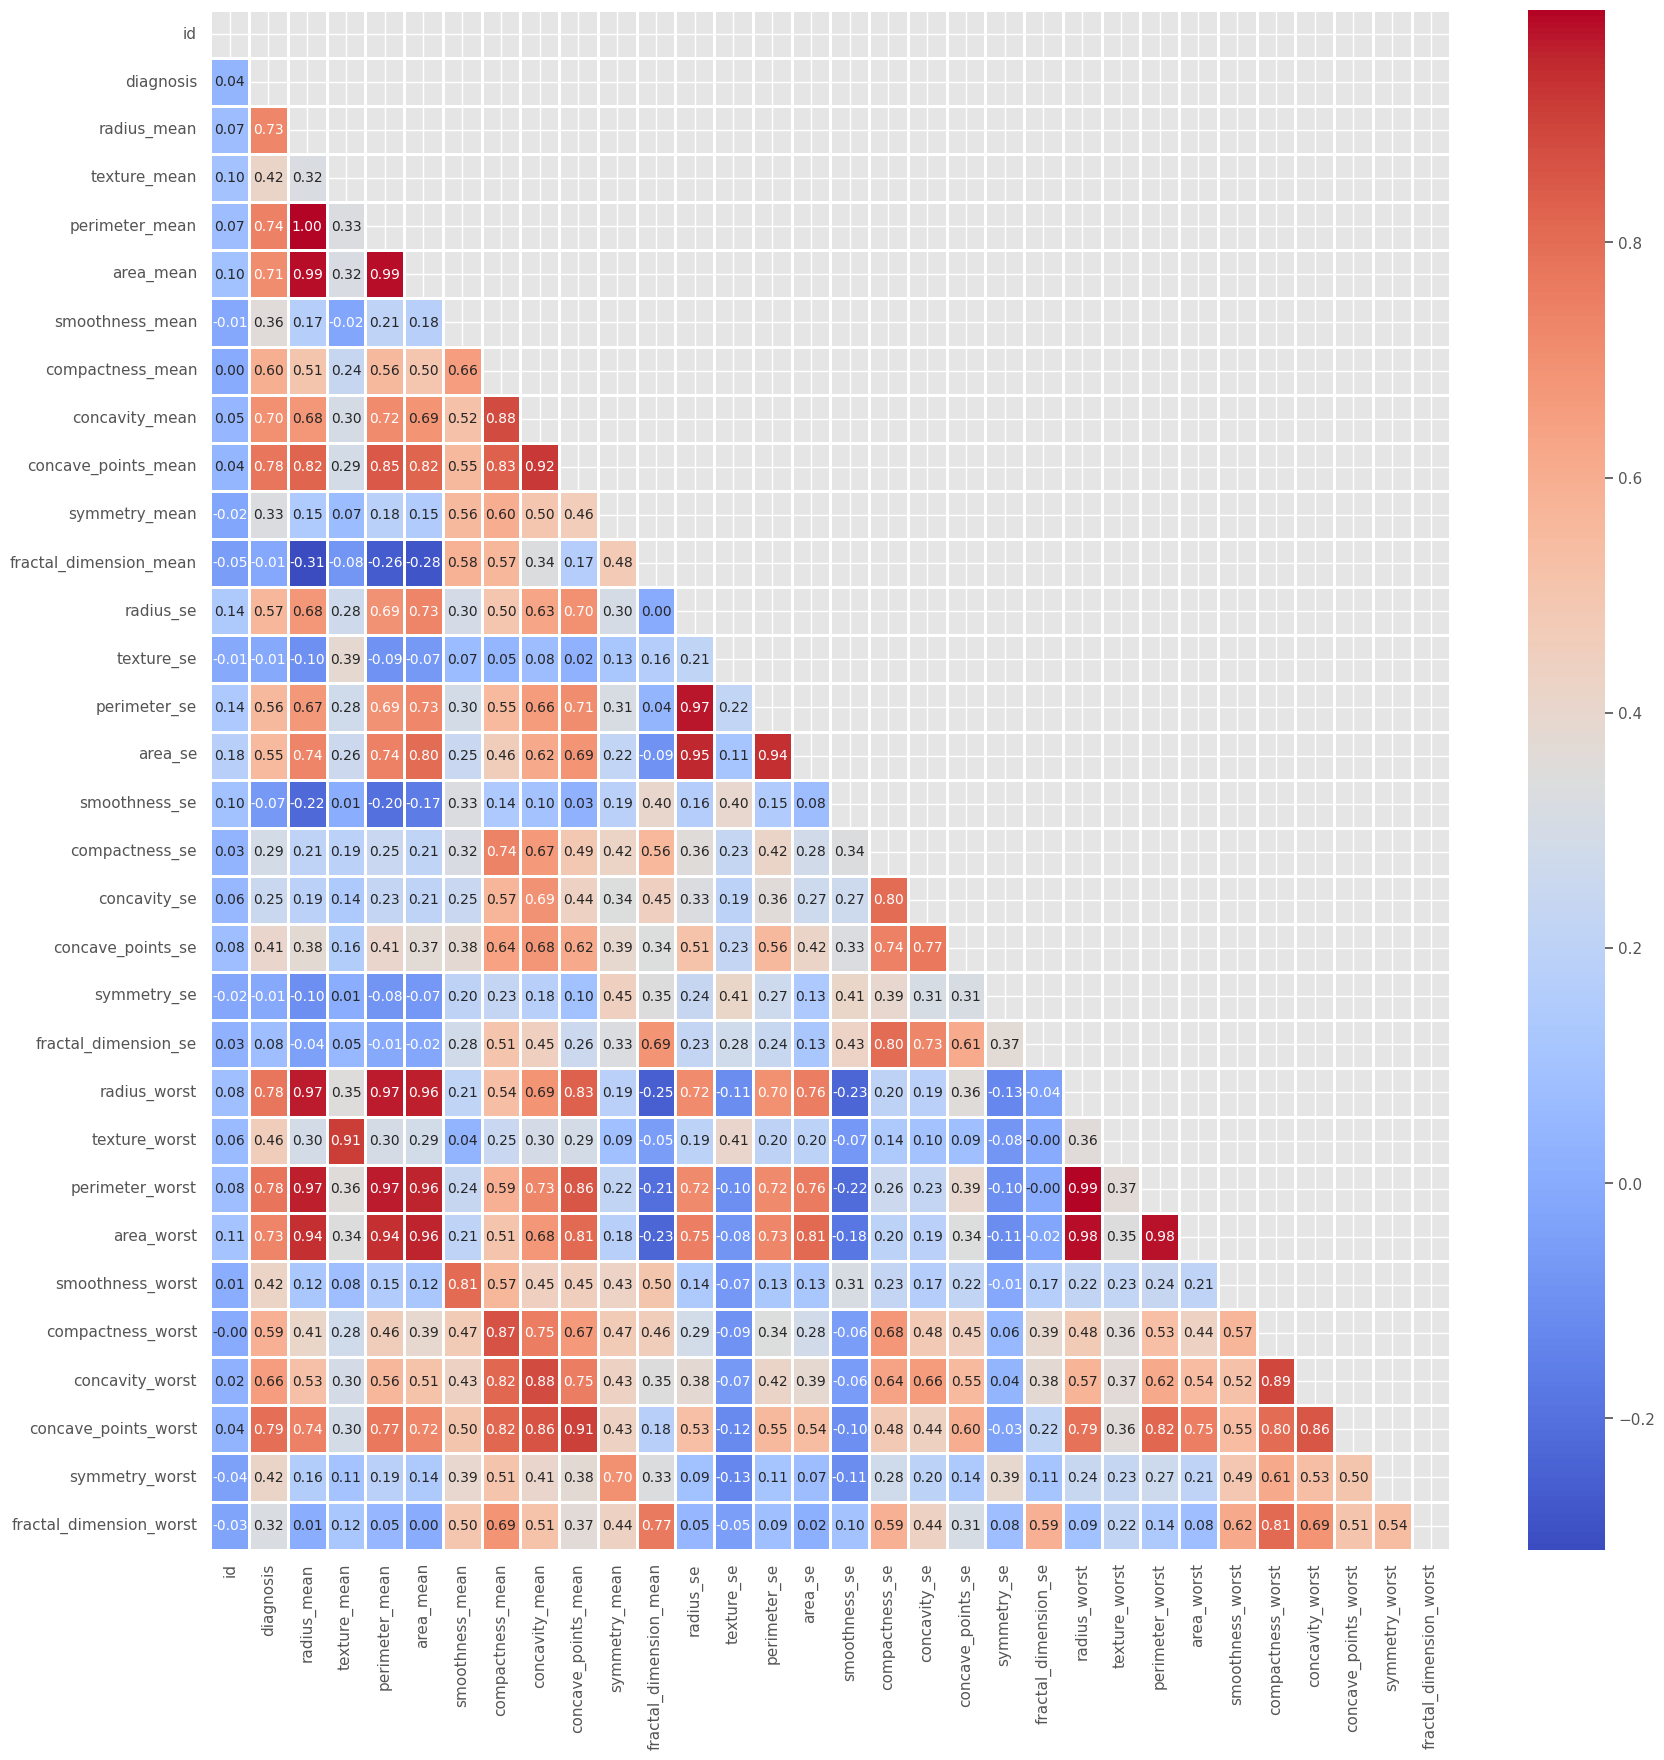

In [37]:
plt.figure(figsize=(20,20))
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap="coolwarm")
plt.show()

In [42]:
data.drop("id", axis = 1, inplace = True)

In [43]:
# calculating correlation matrix
corr_matrix = data.corr().abs()

# creating top triangle matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# masking top triangle
tri_df = corr_matrix.mask(mask)

# finding value of max triangle matrix
max_corr = tri_df.max().max()

print(f"Value of max correlation: {max_corr}")

Value of max correlation: 0.912044588840421


In [44]:
# feature selection
to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
data = data.drop(to_drop, axis=1)
print(data.shape[1])

23


In [45]:
data.head(10)

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,15.70,0.12780,0.17000,0.08089,0.2087,0.07613,0.8902,27.19,0.007510,...,0.02165,0.005082,23.75,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,19.98,0.09463,0.10900,0.07400,0.1794,0.05742,0.7732,53.91,0.004314,...,0.01369,0.002179,27.66,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,20.83,0.11890,0.16450,0.05985,0.2196,0.07451,1.3770,50.96,0.008805,...,0.01486,0.005412,28.14,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,21.82,0.12730,0.19320,0.09353,0.2350,0.07389,1.0020,24.32,0.005731,...,0.02143,0.003749,30.73,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,24.04,0.11860,0.23960,0.08543,0.2030,0.08243,1.5990,23.94,0.007149,...,0.01789,0.010080,40.68,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [46]:
data.tail(10)

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
559,0,23.93,0.09261,0.10210,0.04105,0.1388,0.06570,2.904,16.97,0.008200,...,0.01488,0.004738,37.16,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,27.15,0.09929,0.11260,0.04304,0.1537,0.06171,1.492,29.84,0.007256,...,0.02080,0.005304,33.17,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,29.37,0.07449,0.03558,0.00000,0.1060,0.05502,3.896,22.81,0.007594,...,0.01989,0.001773,38.30,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,1,30.62,0.10480,0.20870,0.09429,0.2128,0.07152,1.205,22.65,0.004625,...,0.02137,0.006142,42.79,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,1,25.09,0.10990,0.22360,0.14740,0.2149,0.06879,1.026,118.80,0.006399,...,0.02057,0.006213,29.41,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,1,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.256,158.70,0.010300,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,1,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.463,99.04,0.005769,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.075,48.55,0.005903,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,1,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.595,86.22,0.006522,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,0,24.54,0.05263,0.04362,0.00000,0.1587,0.05884,1.428,19.15,0.007189,...,0.02676,0.002783,30.37,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [47]:
X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(455, 22)

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = log_reg.predict(X_test)

In [53]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [56]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn.predict(X_test)

In [58]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [60]:
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.967032967032967
0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability = True)

parameters = {
    "gamma" : [0.0001, 0.001, 0.01, 0.1],
    "C" : [0.01, 0.05, 0.5, 0.1, 1, 10]
    
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [62]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [63]:
grid_search.best_score_

0.9758241758241759

In [64]:
svc = SVC(C=10, gamma= 0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [66]:
y_pred = svc.predict(X_test)

In [67]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [69]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [72]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,32,1),
    "min_samples_leaf" : range(1, 10, 1),
    "min_samples_split" : range(2,10,1),
    "splitter" : ["best", "random"]
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [73]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 27,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'splitter': 'random'}

In [75]:
grid_search_dt.best_score_

0.9648351648351647

In [76]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=27, min_samples_leaf=2, min_samples_split=7, splitter="random")

In [77]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=27, min_samples_leaf=2, min_samples_split=7,
                       splitter='random')

In [78]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9758241758241758
0.9298245614035088
[[62  5]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [86]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [87]:
y_pred = rand_clf.predict(X_test)

In [88]:
y_pred = rand_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9736842105263158
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

print(grid_search_gbc.best_params_)

best_gbc = grid_search_gbc.best_estimator_


Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [110]:
grid_search_gbc.best_score_

0.9604586907798129

In [123]:
y_pred_train = best_gbc.predict(X_train)
y_pred_test = best_gbc.predict(X_test)

gbc_acc = accuracy_score(y_train, y_pred_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.956140350877193
Confusion Matrix:
 [[64  3]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [114]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9934065934065934
0.956140350877193
[[65  2]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [124]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,100.00
2,SVM,98.25
4,Random Forest Classifier,97.37
0,Logistic Regression,96.49
1,KNN,95.61
6,XgBoost,95.61
3,Decision Tree Classifier,92.98


In [125]:
import pickle
model = svc
pickle.dump(model, open("brest_cancer.pkl","wb"))

In [126]:
scaling = scaler
pickle.dump(scaling, open("breast_cancer_scaler.pkl","wb"))

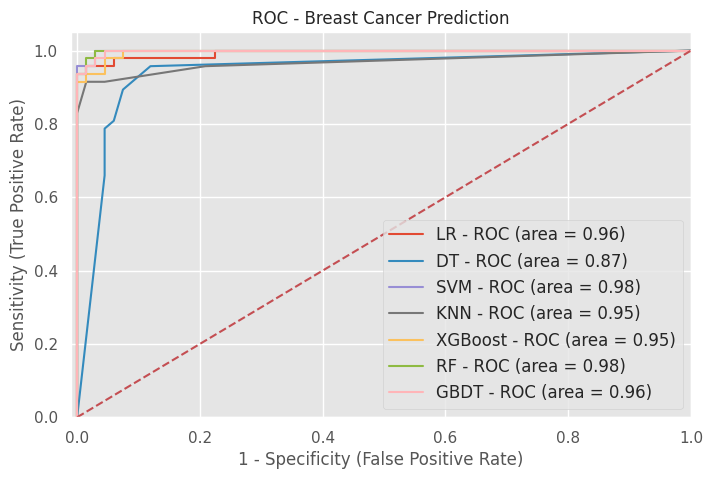

In [127]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[96.49, 92.97999999999999, 98.25, 95.61, 95.61, 97.37, 100.0]
[96.06, 96.06, 97.87, 95.0, 95.32000000000001, 97.13000000000001, 95.63000000000001]


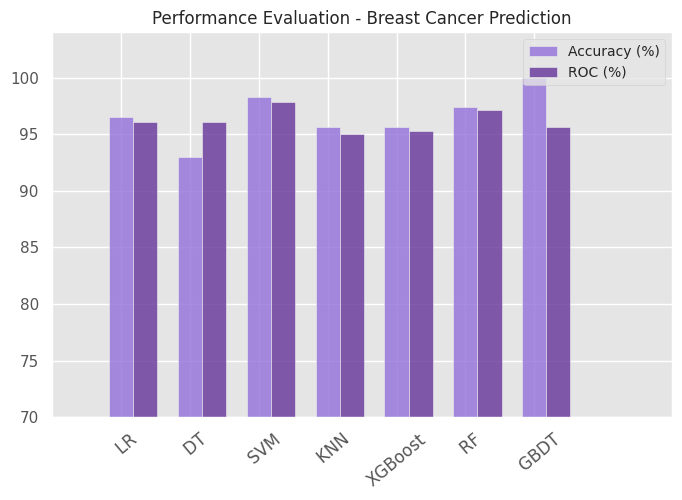

In [128]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [129]:
data.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
data.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')